In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [ ]:
#Obtengo los datos
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

y = np.where(y == "Graduate", 1, 0)


display(X)


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
#Elijo las columnas nominales

nominal_cols = [
    "Marital Status", "Application mode", "Course", "Previous qualification",
    "Mother's qualification", "Father's qualification", "Nacionality",
    "Mother's occupation", "Father's occupation",
    "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

#Onehoteo
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

procesamiento = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot_encoder, nominal_cols)
    ],
    remainder='passthrough'
)


X_enc = procesamiento.fit_transform(X)

one_hot_cols = procesamiento.named_transformers_['one_hot'].get_feature_names_out(nominal_cols)

passthrough_cols = [col for col in X.columns if col not in nominal_cols]

#Junto todas las columnas
all_cols = list(one_hot_cols) + passthrough_cols

X_enc_df = pd.DataFrame(X_enc, columns=all_cols, index=X.index)

display(X_enc_df)

X_train, X_test, y_train, y_test = train_test_split(X_enc_df, y, test_size=0.25)

,Marital Status_1,Marital Status_2,Marital Status_3,Marital Status_4,Marital Status_5,Marital Status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


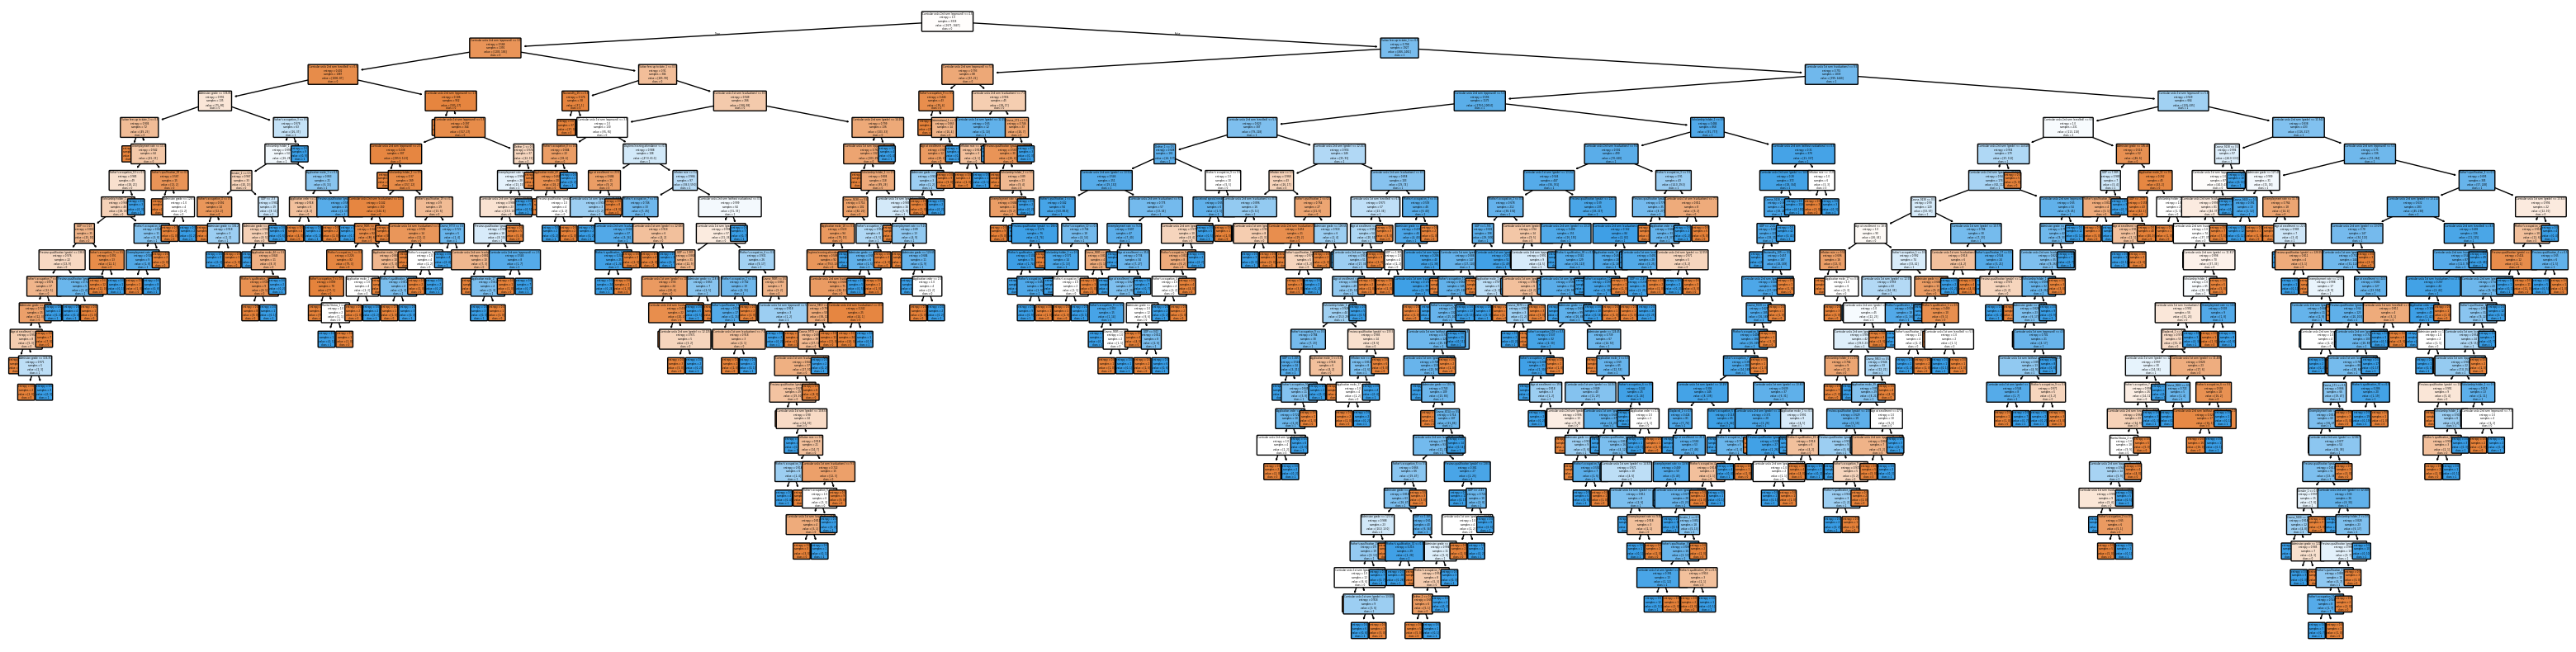

Número de hojas: 383
Número de nodos: 765


In [ ]:
#Armo el arbol
arbol = DecisionTreeClassifier(criterion='entropy')

#Entreno
arbol.fit(X_train, y_train)

plt.figure(figsize=(40,10))
plot_tree(
    arbol,
    feature_names=X_train.columns,
    class_names=[str(c) for c in arbol.classes_],
    filled=True,
    rounded=True,
    fontsize=2
)
plt.show()

hojas = arbol.get_n_leaves()
print(f"Número de hojas: {hojas}")
nodos = arbol.tree_.node_count
print(f"Número de nodos: {nodos}")

#Se observa que al no estar limitando la cantidad de hojas que genera el árbol
#se llega a nodos de impureza 0, pero la complejidad del modelo escala significativamente,
#lo que deriva en un overfitting



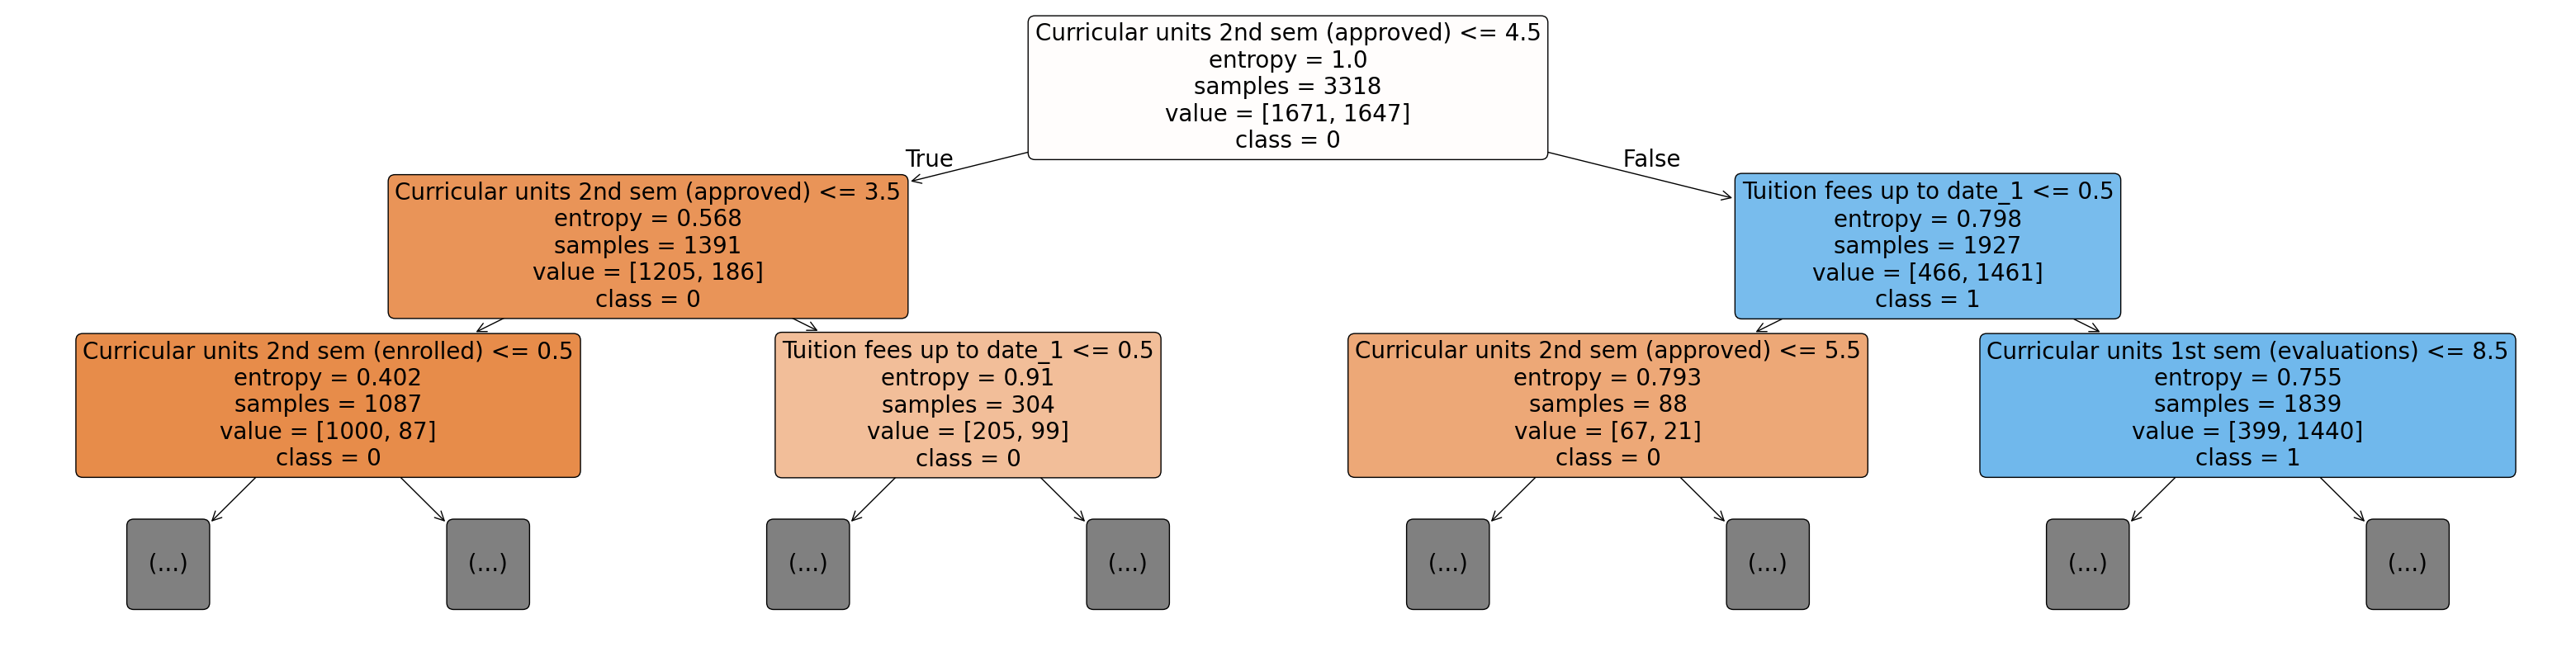

In [ ]:
#Ploteo las primeras ramas del arbol, se observa el primer umbral sobre la feature "curricular units 2nd sem (approved)",
#lo que significa que la decision sobre esa feature logra los nodos de menor impureza en las ramas siguientes. Para el nodo derecho se elige otro umbral
#sobre 'Tuition fees up to date'.
plt.figure(figsize=(40,10))
plot_tree(
    arbol,
    max_depth=2,
    feature_names=X_train.columns,
    class_names=[str(c) for c in arbol.classes_],
    filled=True,
    rounded=True,
    fontsize=20
)
plt.show()

In [ ]:
y_pred = arbol.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Se observan accuracy y F1 similares, aunque con F1 algo menor, indicando una pequeño desbalance en datos.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8110307414104883
F1 Score: 0.8115419296663661


In [ ]:
#Obtengo las importancias, que indican que tanto la decisión a partir de una feature disminuye el costo. Se añade el calculo en un markdown siguiente.
#Se observa que el calculo implica la reducción de costo entre un nodo y los subsiguientes

importancias = arbol.feature_importances_
indices = np.argsort(importancias)[::-1]  # orden descendente

#Se observ

print("Las dos features más importantes son:")
for i in range(2):
    print(f"{X_train.columns[indices[i]]}: {importancias[indices[i]]}")

Las dos features más importantes son:
Curricular units 2nd sem (approved): 0.35783767490222046
Curricular units 2nd sem (enrolled): 0.058720391090318805


##Importancia

Se realiza la sumatoria de la ganancia $\delta_m$ para cada nodo donde se utiliza determinada feature con:

$$\delta_m = H(Q_m) - G_m(j_m,t_m)$$

In [ ]:
#A partir de cost_complexity_pruning obtengo los alphas mas utiles, que me dan diferentes podas del arbol

#El alpha consigue reducir la cantidad de hojas del arbol al penalizando la cantidad de hojas en la función costo complejidad:

#El segundo termino en la ecuacion penaliza la cantidad de hojas mientras que el primero penaliza la impureza de ellas,
# de esa manera cada alpha de una minimización del costo complejidad para un arbol distinto


path = arbol.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
impurezas = path.impurities

print("Alphas posibles:", ccp_alphas)

Alphas posibles: [0.         0.00060277 0.00060277 0.00060277 0.00060277 0.00060277
 0.00060277 0.00060277 0.00060277 0.00073158 0.00081072 0.00083029
 0.00083029 0.00083029 0.00083029 0.00083029 0.00083029 0.00083029
 0.00083029 0.00083029 0.00083029 0.00083029 0.00083029 0.00085427
 0.00093418 0.00096361 0.00097544 0.00097803 0.00097803 0.00097803
 0.00097803 0.00097803 0.00097803 0.00097803 0.00097803 0.00097803
 0.00099064 0.00099469 0.00102359 0.0010277  0.0010277  0.00103331
 0.00103644 0.00106225 0.00107858 0.0010879  0.0010879  0.0010879
 0.00109056 0.00109849 0.00110051 0.00110051 0.0011115  0.00111244
 0.0011292  0.00113388 0.00113388 0.00113427 0.00115061 0.00115459
 0.00115861 0.00117545 0.00117545 0.0011804  0.00120555 0.00120555
 0.00120555 0.00120555 0.00120555 0.00120555 0.00120555 0.00122121
 0.00122282 0.00122906 0.00125538 0.00127457 0.00127872 0.00127918
 0.00128817 0.00129096 0.00130043 0.00130836 0.00131201 0.0013193
 0.00132319 0.00133206 0.00133485 0.00135335 0.

##Funcion Costo complejidad:

$$H_\alpha(T) = \sum_{m\in L(T)} \frac{|Q_m|}{n}\,H(Q_m) + \alpha\,|L(T)|$$

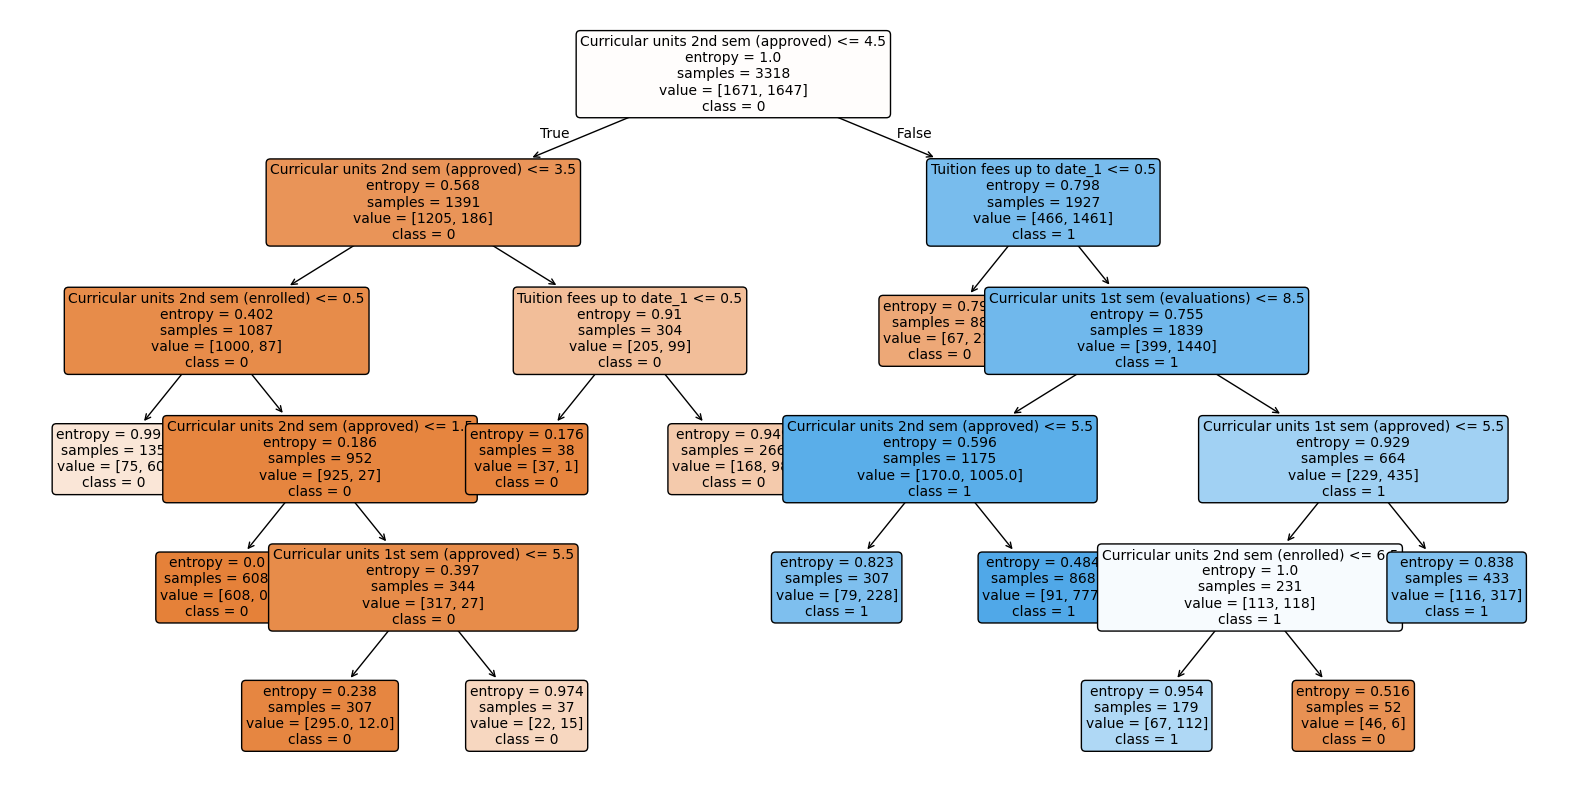

In [ ]:
#Podo el arbol para un alpha determinado

arbol_podado = DecisionTreeClassifier(ccp_alpha=ccp_alphas[-10], criterion='entropy')
arbol_podado.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    arbol_podado,
    feature_names=X_train.columns,
    class_names=[str(c) for c in arbol.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [ ]:
#Calculo metricas

#Se observan cambios en las metricas ya que se esta eligiendo otro modelo, en este caso menos overfitteado

y_pred = arbol_podado.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8417721518987342
F1 Score: 0.8479582971329279


In [ ]:
#Calculo importancias
importancias = arbol.feature_importances_
indices = np.argsort(importancias)[::-1]

print("Las dos features más importantes son:")
for i in range(2):
    print(f"{X_train.columns[indices[i]]}: {importancias[indices[i]]}")

Las dos features más importantes son:
Curricular units 2nd sem (approved): 0.35783767490222046
Curricular units 2nd sem (enrolled): 0.058720391090318805


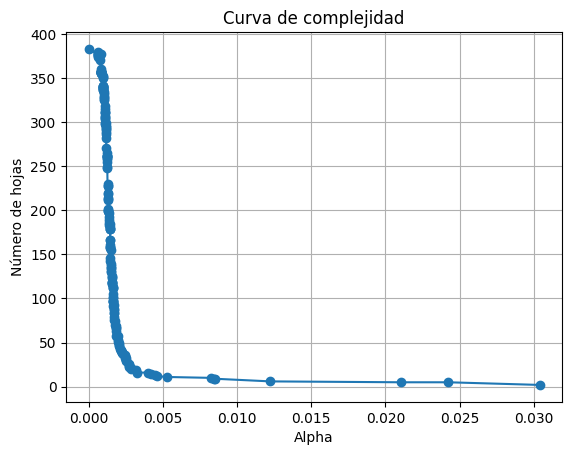

In [ ]:
#Armo un vector para guardar la cantidad de hojas, guardo la cantidad para cada alpha, se observa como es esperado que a mayor alpha la cantidad de hojas es menor

hist_hojas = []
for alpha in ccp_alphas:
    arbol_podado = DecisionTreeClassifier(ccp_alpha=alpha, criterion='entropy')
    arbol_podado.fit(X_train, y_train)
    hojas = arbol_podado.get_n_leaves()
    hist_hojas.append(hojas)


plt.plot(ccp_alphas[:-1], hist_hojas[:-1], marker='o')
plt.xlabel("Alpha")
plt.ylabel("Número de hojas")
plt.title("Curva de complejidad")
plt.grid()
plt.show()

Mejor alpha: 0.003246456562493468
Mejor F1 Score: 0.8479582971329279


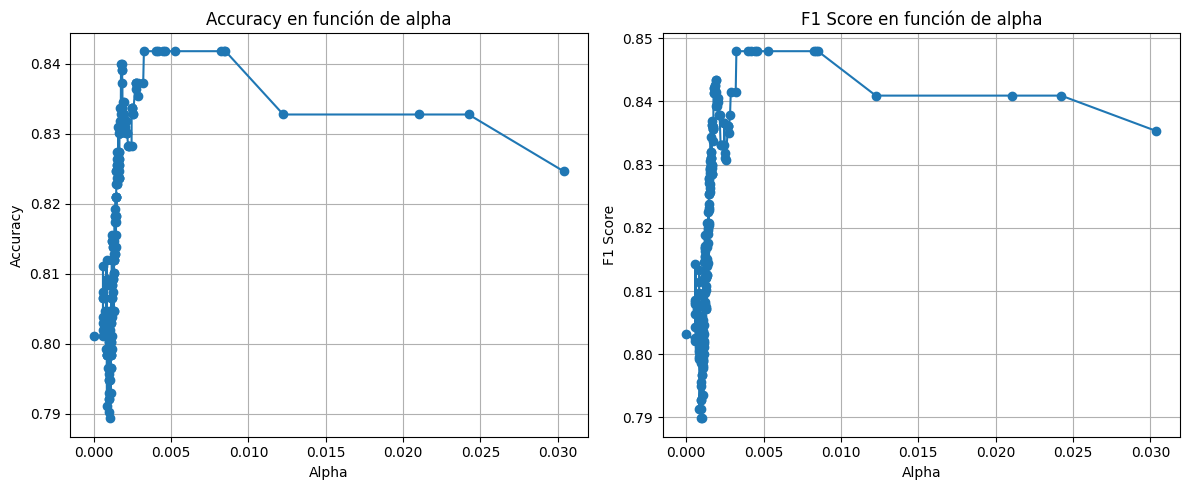

In [ ]:
#Grafico el accuracy y F1 en funcion de alpha, a modo de validacion para luego elegir el alpha que me de el F1 optimo.

hist_acc = []
hist_f1 = []
best_alpha = None
best_f1 = 0
for alpha in ccp_alphas:
    arbol_podado = DecisionTreeClassifier(ccp_alpha=alpha, criterion='entropy')
    arbol_podado.fit(X_train, y_train)
    y_pred = arbol_podado.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    hist_acc.append(accuracy)
    hist_f1.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

print(f"Mejor alpha: {best_alpha}")
print(f"Mejor F1 Score: {best_f1}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 fila, 2 columnas

# Accuracy
axes[0].plot(ccp_alphas[:-1], hist_acc[:-1], marker="o")
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy en función de alpha")
axes[0].grid()

# F1 Score
axes[1].plot(ccp_alphas[:-1], hist_f1[:-1], marker="o")
axes[1].set_xlabel("Alpha")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score en función de alpha")
axes[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
arbol_podado = DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='entropy')
arbol_podado.fit(X_train, y_train)

importancias = arbol_podado.feature_importances_
indices = np.argsort(importancias)[::-1]  # orden descendente

print("Las dos features más importantes son:")
for i in range(2):
    print(f"{X_train.columns[indices[i]]}: {importancias[indices[i]]}")

Las dos features más importantes son:
Curricular units 2nd sem (approved): 0.7227651511564184
Curricular units 1st sem (enrolled): 0.08048834683238665


In [ ]:
#Creo el random forest con 20 árboles, esto consiste en la creacion de varios modelos, donde en cada uno se realiza una eleccion aleatoria de una cantidad de features igual a
#\sqrt(num_features), finalmente se predice con cada modelo y se realiza una decision por "votacion", o sea se elige la prediccion mayoritaria entre los n arboles

rf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


#Calculo metricas
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8599
F1 Score: 0.8646


In [ ]:
#Obtengo importancias, se ve que la elección aleatoria de las features en diferentes arboles desemboca en una variación sobre que features son más importantes
importancias = rf.feature_importances_
indices = np.argsort(importancias)[::-1]

print("Dos features más importantes:")
for i in range(2):
    print(f"{X_train.columns[indices[i]]}: {importancias[indices[i]]:.4f}")

Dos features más importantes:
Curricular units 2nd sem (approved): 0.1204
Curricular units 1st sem (approved): 0.0954
